# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros;
- Aplique três métodos de clustering distintos nas duas bases acima.
- Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import *
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from clustering.labelMatch import rotulos, labelmatch, compute_err
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
from munkres import Munkres

# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **dim128.csv** que contém dados não descritos, onde foram feitos para a realização de clustering que se encontram no site:
http://cs.uef.fi/sipu/datasets/

## 1.1 Carregamento do arquivo

In [3]:
dataset = './dataset/dim128/dim128.csv'
clusters = './dataset/dim128/dim128pa.csv'

In [4]:
data = pd.read_csv(
    dataset,
    header = None
    )

label = pd.read_csv(
    clusters,
    header = None
    )

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,145,142,131,135,208,209,65,128,183,131,...,199,218,182,53,144,198,93,34,99,79
1,149,148,137,137,213,209,71,125,183,125,...,198,222,182,52,148,198,97,35,99,78
2,151,144,135,132,210,208,67,124,183,128,...,198,218,182,52,144,196,93,38,101,78
3,148,141,136,135,207,209,65,127,184,130,...,197,219,184,50,144,198,92,36,101,82
4,146,145,136,135,208,212,70,130,185,129,...,199,217,182,52,148,198,95,36,96,80


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,125.248047,150.040039,134.053711,134.069336,118.694336,145.112305,125.099609,117.110352,108.508789,126.273438,...,145.520508,133.936523,130.793945,136.500000,136.348633,117.336914,123.756836,99.931641,110.326172,151.151367
std,51.254859,48.465458,49.652222,38.661577,54.941676,44.562082,51.200904,48.900247,51.715931,50.317170,...,54.379262,55.852890,58.455433,52.589374,51.880328,60.981599,46.710213,49.196389,60.645574,49.358342
min,31.000000,45.000000,42.000000,46.000000,35.000000,65.000000,52.000000,41.000000,31.000000,41.000000,...,34.000000,42.000000,41.000000,47.000000,30.000000,32.000000,25.000000,27.000000,30.000000,58.000000
25%,89.500000,129.500000,104.500000,100.750000,76.500000,111.250000,66.000000,72.000000,68.000000,89.000000,...,105.750000,90.750000,83.000000,103.500000,100.250000,60.750000,94.000000,63.000000,54.750000,114.750000
50%,117.000000,145.000000,142.000000,139.500000,111.000000,143.000000,130.000000,116.000000,100.000000,121.500000,...,150.500000,133.000000,111.500000,134.000000,133.000000,113.500000,124.000000,87.500000,98.000000,179.500000
75%,158.500000,191.000000,174.000000,167.000000,158.000000,180.000000,171.250000,152.250000,137.250000,176.000000,...,194.000000,187.000000,195.750000,184.500000,187.000000,181.250000,159.000000,128.250000,168.000000,190.000000
max,220.000000,225.000000,205.000000,195.000000,227.000000,218.000000,207.000000,220.000000,207.000000,218.000000,...,223.000000,224.000000,222.000000,218.000000,218.000000,209.000000,210.000000,194.000000,215.000000,204.000000


# 2. Pré-processamento

#### Validações efetivadas:
- 1. Dados faltantes representados por "NaN"
- 2. Dados que não possuem valores númericos

In [7]:
# data.isna().sum()

In [8]:
# for col in data:
#     print(col, data[col].unique())

#### 2.1 Conclusão:
- Os dados não possuem a necessidade de pré-processamento visto que já estão todos com valores validos

###  2.3 Análise estatística

In [9]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.000000,-0.298556,0.099976,0.022622,0.147617,0.121319,-0.126459,0.467975,0.279398,-0.138266,...,-0.357315,-0.012444,0.125286,0.218881,-0.253469,0.034045,0.463972,-0.023602,-0.188079,0.311024
1,-0.298556,1.000000,-0.185263,0.432802,-0.292705,0.061192,-0.019780,0.016283,-0.213111,0.143765,...,-0.173967,0.247016,0.633308,0.059660,0.505386,0.016683,-0.548772,0.217301,0.429549,-0.073918
2,0.099976,-0.185263,1.000000,0.067625,0.362365,-0.028879,0.080121,0.012888,0.007419,0.235775,...,0.223319,-0.231223,-0.192837,0.184547,0.445270,-0.044062,0.567061,-0.184789,-0.021832,0.222362
3,0.022622,0.432802,0.067625,1.000000,0.099326,-0.144059,-0.112927,0.266907,-0.429601,-0.028823,...,-0.416790,-0.262267,0.586108,-0.148362,0.295559,-0.358739,-0.241791,0.213103,-0.361639,-0.177917
4,0.147617,-0.292705,0.362365,0.099326,1.000000,0.293487,-0.131999,-0.170449,0.577666,-0.063625,...,0.227436,-0.035686,0.014784,-0.217203,0.237352,0.033921,0.189920,-0.551513,0.109259,-0.318805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.034045,0.016683,-0.044062,-0.358739,0.033921,0.005289,0.050475,-0.220242,0.284786,-0.384904,...,-0.014952,0.285386,-0.044914,0.278613,0.218825,1.000000,-0.225108,-0.049457,0.195657,-0.273943
124,0.463972,-0.548772,0.567061,-0.241791,0.189920,-0.258597,0.129884,0.046233,0.049035,0.115393,...,0.125422,-0.340187,-0.507953,0.413947,-0.233779,-0.225108,1.000000,-0.204440,-0.045870,0.515130
125,-0.023602,0.217301,-0.184789,0.213103,-0.551513,-0.268762,0.541192,0.318943,-0.447063,0.044297,...,-0.288177,0.100666,0.075201,-0.131423,-0.175185,-0.049457,-0.204440,1.000000,0.001906,0.355830
126,-0.188079,0.429549,-0.021832,-0.361639,0.109259,0.058695,0.386794,-0.197502,0.433910,0.145782,...,0.329098,0.320879,-0.103570,0.085155,0.183157,0.195657,-0.045870,0.001906,1.000000,0.143927


### 2.4 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [10]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data)

In [11]:
# data_scaler

In [12]:
data_scaled = pd.DataFrame(data_scaler)
data_scaled.head()


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.385556,-0.165973,-0.061532,0.024084,1.626257,1.434379,-1.174373,0.222800,1.441096,0.093981,...,0.983934,1.505823,0.876413,-1.588549,0.147553,1.323391,-0.658782,-1.340827,-0.186851,-1.462501
1,0.463635,-0.042113,0.059368,0.075840,1.717307,1.434379,-1.057131,0.161421,1.441096,-0.025321,...,0.965536,1.577474,0.876413,-1.607574,0.224691,1.323391,-0.573106,-1.320491,-0.186851,-1.482771
2,0.502675,-0.124687,0.019068,-0.053551,1.662677,1.411927,-1.135292,0.140961,1.441096,0.034330,...,0.965536,1.505823,0.876413,-1.607574,0.147553,1.290578,-0.658782,-1.259481,-0.153857,-1.482771
3,0.444115,-0.186617,0.039218,0.024084,1.608047,1.434379,-1.174373,0.202340,1.460442,0.074098,...,0.947138,1.523736,0.910643,-1.645623,0.147553,1.323391,-0.680201,-1.300154,-0.153857,-1.401691
4,0.405076,-0.104043,0.039218,0.024084,1.626257,1.501734,-1.076671,0.263719,1.479787,0.054214,...,0.983934,1.487910,0.876413,-1.607574,0.224691,1.323391,-0.615944,-1.300154,-0.236343,-1.442231


### 2.5 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há alguns outliers.

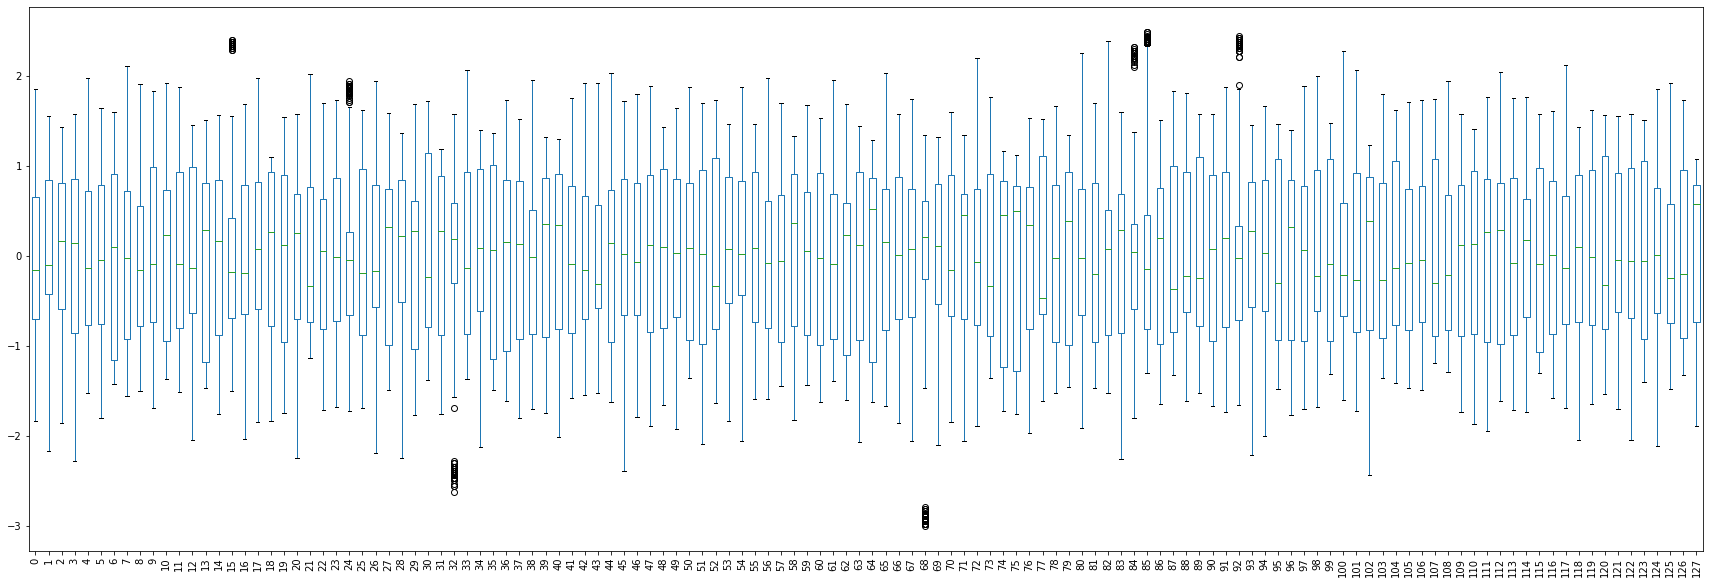

In [13]:
data_scaled.plot(kind = 'box', figsize=(30,10), rot=90, )

# 3. Clustering

## 3.1 Dataset Completo

### 3.1.1 K-Means

In [14]:
data_kmeans = data_scaled.copy()

In [15]:
kmeans = KMeans(n_clusters = 16, init = 'random')
kmeans.fit(data_kmeans)

KMeans(init='random', n_clusters=16)

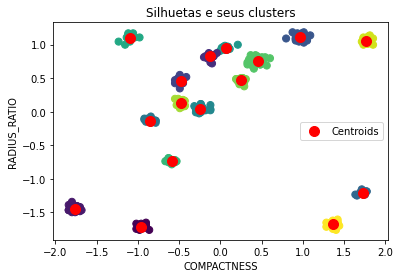

In [16]:
plt.scatter(data_scaler[:,0], data_scaler[:,31], s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 31], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()


### 3.1.2 Agglomerative Clustering

In [17]:
data_agglo = data_scaled.copy()

In [18]:
agglo = AgglomerativeClustering(n_clusters=16, linkage='ward')
agglo.fit(data_agglo)

AgglomerativeClustering(n_clusters=16)

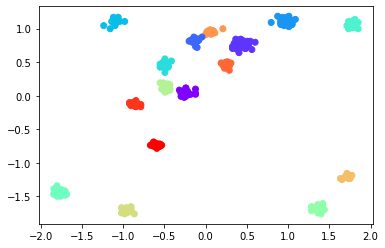

In [19]:
plt.scatter(data_scaler[:,0],data_scaler[:,31], c=agglo.labels_, cmap='rainbow')

### 3.1.3 Spectral Clustering

In [20]:
data_spectral = data_scaled.copy()

In [21]:
spectral = SpectralClustering(n_clusters=16)
spectral.fit(data_spectral)


SpectralClustering(n_clusters=16)

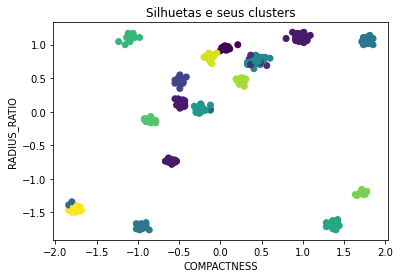

In [22]:
plt.scatter(data_scaler[:,0], data_scaler[:,31], c = spectral.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()

## 3.2 Dataset com atributos selecionados

In [23]:
data_reduzida = pd.DataFrame(SelectKBest(chi2, k=100).fit_transform(data, label))
data_reduzida.shape

data_scaler2 = scaler.fit_transform(X = data_reduzida)

In [24]:
# data_scaler2

In [25]:
data_scaled2 = pd.DataFrame(data_scaler2)
data_scaled2.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.385556,-0.061532,1.626257,-1.174373,0.222800,1.441096,0.093981,0.659131,0.791048,1.101567,...,0.983934,1.505823,0.876413,-1.588549,0.147553,1.323391,-0.658782,-1.340827,-0.186851,-1.462501
1,0.463635,0.059368,1.717307,-1.057131,0.161421,1.441096,-0.025321,0.624542,0.827657,1.081989,...,0.965536,1.577474,0.876413,-1.607574,0.224691,1.323391,-0.573106,-1.320491,-0.186851,-1.482771
2,0.502675,0.019068,1.662677,-1.135292,0.140961,1.441096,0.034330,0.676425,0.754439,1.101567,...,0.965536,1.505823,0.876413,-1.607574,0.147553,1.290578,-0.658782,-1.259481,-0.153857,-1.482771
3,0.444115,0.039218,1.608047,-1.174373,0.202340,1.460442,0.074098,0.659131,0.809353,1.062412,...,0.947138,1.523736,0.910643,-1.645623,0.147553,1.323391,-0.680201,-1.300154,-0.153857,-1.401691
4,0.405076,0.039218,1.626257,-1.076671,0.263719,1.479787,0.054214,0.693720,0.827657,1.042834,...,0.983934,1.487910,0.876413,-1.607574,0.224691,1.323391,-0.615944,-1.300154,-0.236343,-1.442231


### 3.2.1 K-Means

In [26]:
data_kmeans2 = data_scaled2.copy()

In [27]:
kmeans2 = KMeans(n_clusters = 16, init = 'random')
kmeans2.fit(data_kmeans2)

KMeans(init='random', n_clusters=16)

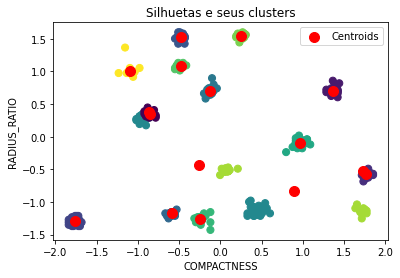

In [28]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], s = 50, c = kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 3], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()

### 3.2.2 Agglomerative Clustering

In [29]:
data_agglo2 = data_scaled2.copy()

In [30]:
agglo2 = AgglomerativeClustering(n_clusters=16, linkage='ward')
agglo2.fit(data_agglo2)

AgglomerativeClustering(n_clusters=16)

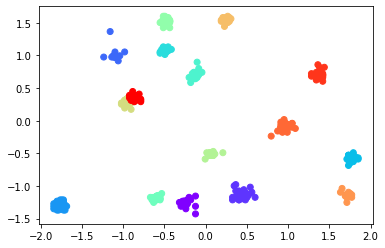

In [31]:
plt.scatter(data_scaler2[:,0],data_scaler2[:,3], c=agglo2.labels_, cmap='rainbow')

### 3.2.3

In [32]:
data_spectral2 = data_scaled2.copy()

In [33]:
spectral2 = SpectralClustering(n_clusters=16)
spectral2.fit(data_spectral2)


SpectralClustering(n_clusters=16)

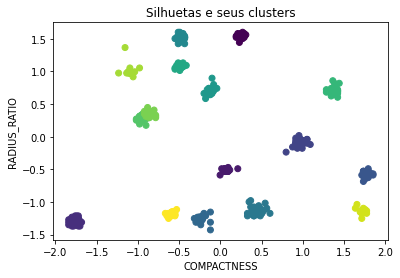

In [34]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], c = spectral2.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()


# 4. Avaliação

In [35]:
lista = np.array(label[0].tolist())
for idx, value in np.ndenumerate(lista):
    lista[idx] = value - 1

### 4.1.1 KMeans - Completo

In [36]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista


predict = rotulos(kmeans.cluster_centers_, 16, dataset, newData)

In [37]:
predict

array([11., 11., 11., ...,  4.,  4.,  4.])

In [38]:
# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)

In [39]:
# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('KMeans - Completo')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_kmeans_completo = np.array(["KmeansCompleto", hbt, arit, amit, f1t, accurracyt, silhouettet])

KMeans - Completo

Confusion Matrix: 
 [[64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]]

Calinski-Harabaz Score:  86413.56951870107

Adjusted-Rand Score:  1.0

Adjusted Mutual Info Score:  1.0

F1 Score:  1.0

Accuracy Score:  1.0



### 4.1.2 KMeans - Selecionado

In [40]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

In [41]:
# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(kmeans2.cluster_centers_, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)

# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('KMeans - Selecionado')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_kmeans_selecionado = np.array(["KmeansSelecionado", hbt, arit, amit, f1t, accurracyt, silhouettet])

KMeans - Selecionado

Confusion Matrix: 
 [[64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 56  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]]

Calinski-Harabaz Score:  554.3204348511993

Adjusted-Rand Score:  0.8716755078204489

Adjusted Mutual Info Score:  0.9619814752023069

F1 Sc

### 4.2.1 Agglomerative Clustering - Completo

In [42]:
def centroide(data):
    array2 = []
    for valor in range(0,16):
        df_aux = data.loc[data.Label == valor]
        array = []
        for coluna in df_aux:
            array.append(df_aux[coluna].mean())

        array2.append(array)

    return np.array(array2)

In [43]:
data_agglo['Label'] = agglo.labels_

In [44]:
centroide_hieraquico = centroide(data_agglo)

In [45]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Agglomerative Clustering - Completo')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_aglome_completo = np.array(["AgglomerativeCompleto", hbt, arit, amit, f1t, accurracyt, silhouettet])

Agglomerative Clustering - Completo

Confusion Matrix: 
 [[64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]]

Calinski-Harabaz Score:  86413.56951870107

Adjusted-Rand Score:  1.0

Adjusted Mutual Info Score:  1.0

F1 Score:  1.0

Accu

In [46]:
ae = compute_err(labels_true,predict,newData.ncluster)

### 4.2.2  Agglomerative Clustering - Selecionado

In [47]:
data_agglo2['Label'] = agglo2.labels_
data_agglo2.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.385556,-0.061532,1.626257,-1.174373,0.222800,1.441096,0.093981,0.659131,0.791048,1.101567,...,1.505823,0.876413,-1.588549,0.147553,1.323391,-0.658782,-1.340827,-0.186851,-1.462501,1
1,0.463635,0.059368,1.717307,-1.057131,0.161421,1.441096,-0.025321,0.624542,0.827657,1.081989,...,1.577474,0.876413,-1.607574,0.224691,1.323391,-0.573106,-1.320491,-0.186851,-1.482771,1
2,0.502675,0.019068,1.662677,-1.135292,0.140961,1.441096,0.034330,0.676425,0.754439,1.101567,...,1.505823,0.876413,-1.607574,0.147553,1.290578,-0.658782,-1.259481,-0.153857,-1.482771,1
3,0.444115,0.039218,1.608047,-1.174373,0.202340,1.460442,0.074098,0.659131,0.809353,1.062412,...,1.523736,0.910643,-1.645623,0.147553,1.323391,-0.680201,-1.300154,-0.153857,-1.401691,1
4,0.405076,0.039218,1.626257,-1.076671,0.263719,1.479787,0.054214,0.693720,0.827657,1.042834,...,1.487910,0.876413,-1.607574,0.224691,1.323391,-0.615944,-1.300154,-0.236343,-1.442231,1


In [48]:
centroide_hieraquico2 = centroide(data_agglo2)

In [49]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico2, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Agglomerative Clustering - Selecionado')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_aglome_selecionado = np.array(["AgglometariveSelecionado", hbt, arit, amit, f1t, accurracyt, silhouettet])

Agglomerative Clustering - Selecionado

Confusion Matrix: 
 [[64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]]

Calinski-Harabaz Score:  94093.58820563472

Adjusted-Rand Score:  1.0

Adjusted Mutual Info Score:  1.0

F1 Score:  1.0

A

### 4.3.1 Spectral Clustering - Completo

In [50]:
data_spectral['Label'] = spectral.labels_
data_spectral.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,0.385556,-0.165973,-0.061532,0.024084,1.626257,1.434379,-1.174373,0.222800,1.441096,0.093981,...,1.505823,0.876413,-1.588549,0.147553,1.323391,-0.658782,-1.340827,-0.186851,-1.462501,7
1,0.463635,-0.042113,0.059368,0.075840,1.717307,1.434379,-1.057131,0.161421,1.441096,-0.025321,...,1.577474,0.876413,-1.607574,0.224691,1.323391,-0.573106,-1.320491,-0.186851,-1.482771,7
2,0.502675,-0.124687,0.019068,-0.053551,1.662677,1.411927,-1.135292,0.140961,1.441096,0.034330,...,1.505823,0.876413,-1.607574,0.147553,1.290578,-0.658782,-1.259481,-0.153857,-1.482771,7
3,0.444115,-0.186617,0.039218,0.024084,1.608047,1.434379,-1.174373,0.202340,1.460442,0.074098,...,1.523736,0.910643,-1.645623,0.147553,1.323391,-0.680201,-1.300154,-0.153857,-1.401691,7
4,0.405076,-0.104043,0.039218,0.024084,1.626257,1.501734,-1.076671,0.263719,1.479787,0.054214,...,1.487910,0.876413,-1.607574,0.224691,1.323391,-0.615944,-1.300154,-0.236343,-1.442231,7


In [51]:
centroide_spectral = centroide(data_spectral)

In [52]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Spectral Clustering - Completo')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_spectral_completo = np.array(["SpectralCompleto", hbt, arit, amit, f1t, accurracyt, silhouettet])

Spectral Clustering - Completo

Confusion Matrix: 
 [[ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Calinski-Harabaz Score:  260.77693262215905

Adjusted-Rand Score:  0.6653581943081452

Adjusted Mutual Info Score:  0.912317718800

### 4.3.2  Spectral Clustering - Selecionado

In [53]:
data_spectral2['Label'] = spectral2.labels_
data_spectral2.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.385556,-0.061532,1.626257,-1.174373,0.222800,1.441096,0.093981,0.659131,0.791048,1.101567,...,1.505823,0.876413,-1.588549,0.147553,1.323391,-0.658782,-1.340827,-0.186851,-1.462501,6
1,0.463635,0.059368,1.717307,-1.057131,0.161421,1.441096,-0.025321,0.624542,0.827657,1.081989,...,1.577474,0.876413,-1.607574,0.224691,1.323391,-0.573106,-1.320491,-0.186851,-1.482771,6
2,0.502675,0.019068,1.662677,-1.135292,0.140961,1.441096,0.034330,0.676425,0.754439,1.101567,...,1.505823,0.876413,-1.607574,0.147553,1.290578,-0.658782,-1.259481,-0.153857,-1.482771,6
3,0.444115,0.039218,1.608047,-1.174373,0.202340,1.460442,0.074098,0.659131,0.809353,1.062412,...,1.523736,0.910643,-1.645623,0.147553,1.323391,-0.680201,-1.300154,-0.153857,-1.401691,6
4,0.405076,0.039218,1.626257,-1.076671,0.263719,1.479787,0.054214,0.693720,0.827657,1.042834,...,1.487910,0.876413,-1.607574,0.224691,1.323391,-0.615944,-1.300154,-0.236343,-1.442231,6


In [54]:
centroide_spectral2 = centroide(data_spectral2)

In [55]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral2, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabasz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Spectral Clustering - Selecionado')
print('\nConfusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

result_spectral_selecionado = np.array(["SpectralSelecionado", hbt, arit, amit, f1t, accurracyt, silhouettet])

Spectral Clustering - Selecionado

Confusion Matrix: 
 [[64  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64]]

Calinski-Harabaz Score:  94093.58820563472

Adjusted-Rand Score:  1.0

Adjusted Mutual Info Score:  1.0

F1 Score:  1.0

Accura

In [56]:
result_columns = np.array(["Cluster", "Calinski Harabas", "Adjusted-Rand", "Adjusted Mutual Info", "F1", "Accuracy", "Silhouette"])
results = np.array([result_kmeans_completo, result_kmeans_selecionado, result_aglome_completo, result_aglome_selecionado, result_spectral_completo, result_spectral_selecionado])

pd.DataFrame(data=results, columns=result_columns)

,Cluster,Calinski Harabas,Adjusted-Rand,Adjusted Mutual Info,F1,Accuracy,Silhouette
0,KmeansCompleto,86413.56951870107,1.0,1.0,1.0,1.0,0.9746405449945033
1,KmeansSelecionado,554.3204348511993,0.8716755078204489,0.9619814752023069,0.8291666666666666,0.8671875,0.8033574906523815
2,AgglomerativeCompleto,86413.56951870107,1.0,1.0,1.0,1.0,0.9746405449945033
3,AgglometariveSelecionado,94093.58820563472,1.0,1.0,1.0,1.0,0.9752837913952893
4,SpectralCompleto,260.77693262215905,0.6653581943081452,0.9123177188009717,0.6916666666666667,0.75,0.7110878949026685
5,SpectralSelecionado,94093.58820563472,1.0,1.0,1.0,1.0,0.9752837913952893
